In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3151,-118.61,34.99,11.0,4031.0,766.0,1539.0,564.0,3.8917,INLAND,120800.0
18800,-121.86,40.77,17.0,2816.0,639.0,1027.0,406.0,2.5030,INLAND,65600.0
5787,-118.24,34.15,19.0,4852.0,1465.0,3171.0,1332.0,2.5924,<1H OCEAN,192900.0
1076,-121.80,39.75,11.0,7212.0,1355.0,3264.0,1264.0,3.1125,INLAND,122600.0
3986,-118.64,34.18,33.0,3808.0,623.0,1784.0,615.0,5.1641,<1H OCEAN,263400.0
...,...,...,...,...,...,...,...,...,...,...
5359,-118.39,34.05,25.0,2814.0,701.0,1139.0,658.0,4.0153,<1H OCEAN,460000.0
12803,-121.45,38.60,44.0,2324.0,413.0,823.0,375.0,4.6625,INLAND,158900.0
5826,-118.30,34.19,52.0,1704.0,277.0,746.0,262.0,4.7986,<1H OCEAN,326100.0
16738,-122.42,37.71,44.0,2080.0,489.0,1781.0,478.0,3.6827,NEAR BAY,215300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

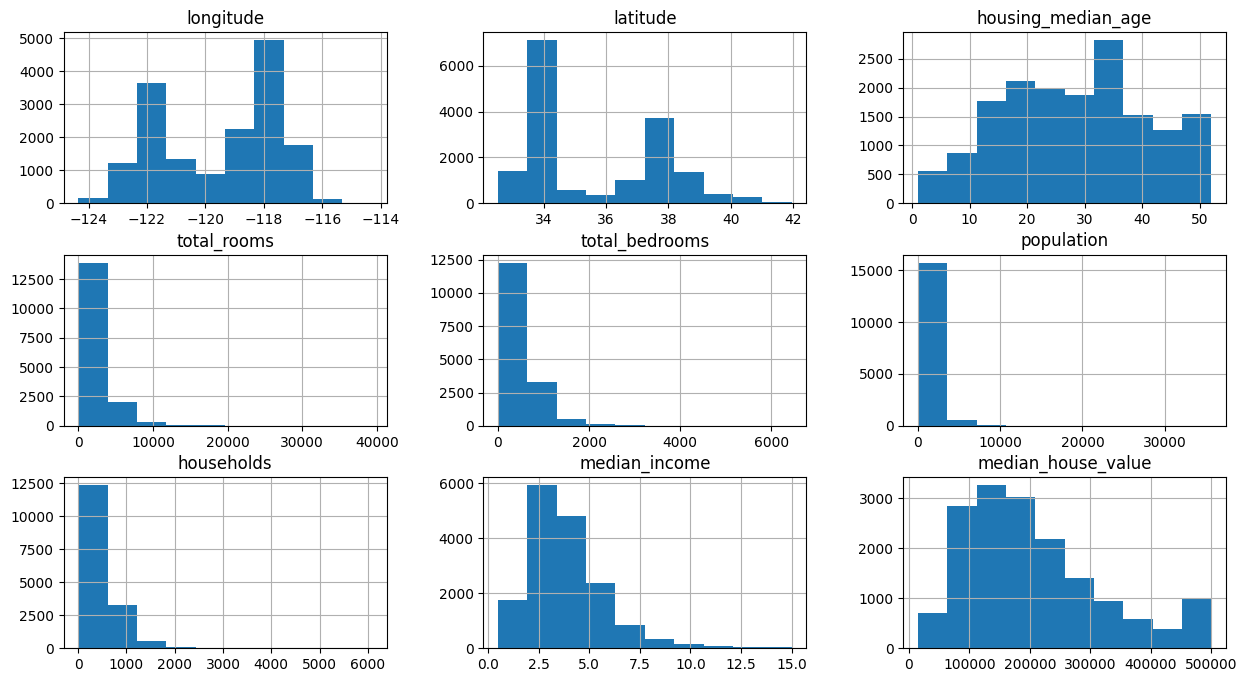

In [10]:
train_data.hist(figsize = (15,8))

<Axes: >

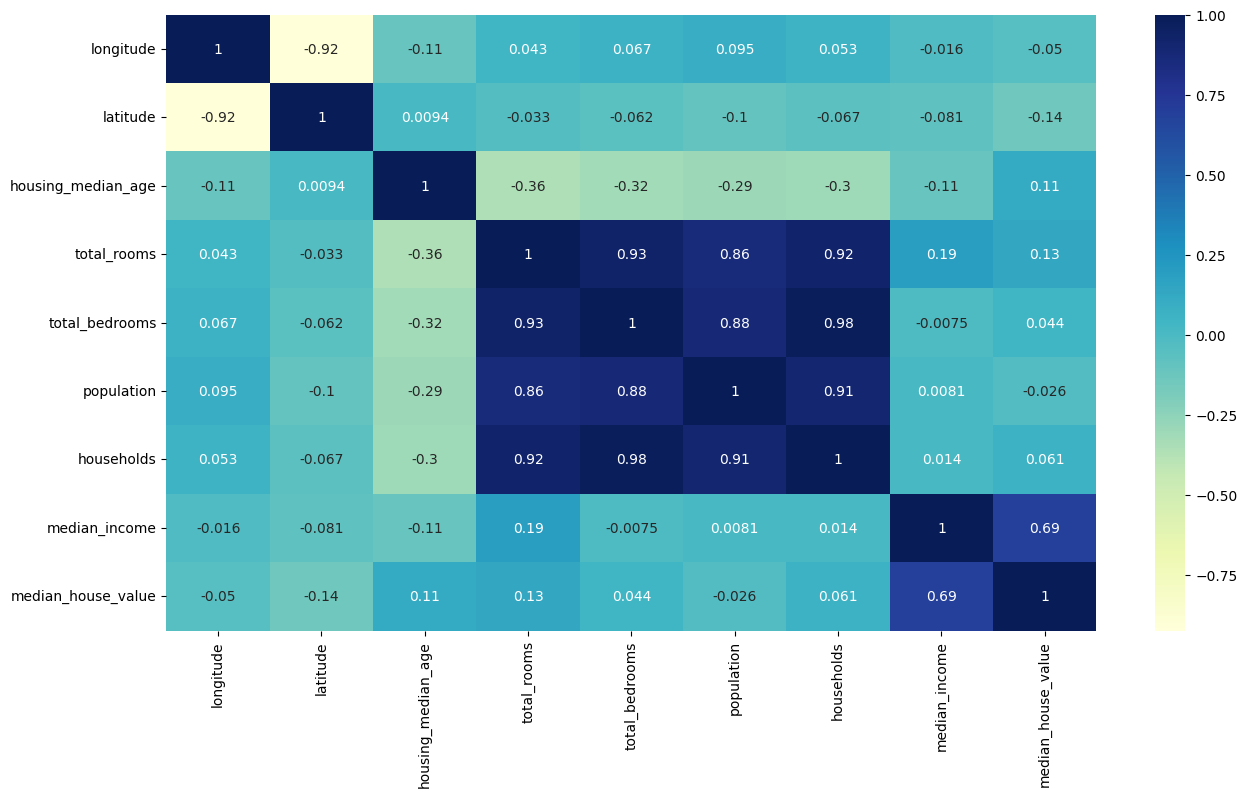

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['populations'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'populations'}>, <Axes: >, <Axes: >]],
      dtype=object)

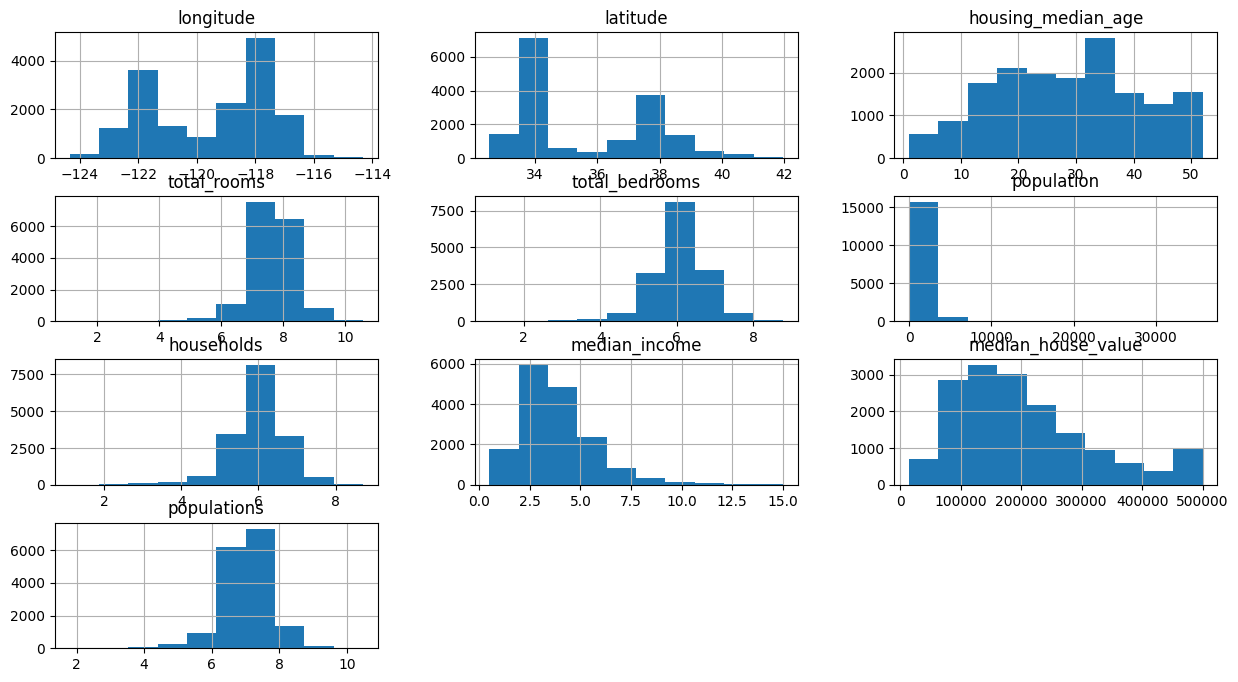

In [13]:
train_data.hist(figsize = (15,8))

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,populations
3151,-118.61,34.99,11.0,8.302018,6.642487,1539.0,6.336826,3.8917,INLAND,120800.0,7.339538
18800,-121.86,40.77,17.0,7.943428,6.461468,1027.0,6.008813,2.5030,INLAND,65600.0,6.935370
5787,-118.24,34.15,19.0,8.487352,7.290293,3171.0,7.195187,2.5924,<1H OCEAN,192900.0,8.062118
1076,-121.80,39.75,11.0,8.883640,7.212294,3264.0,7.142827,3.1125,INLAND,122600.0,8.091015
3986,-118.64,34.18,33.0,8.245122,6.436150,1784.0,6.423247,5.1641,<1H OCEAN,263400.0,7.487174
...,...,...,...,...,...,...,...,...,...,...,...
5359,-118.39,34.05,25.0,7.942718,6.553933,1139.0,6.490724,4.0153,<1H OCEAN,460000.0,7.038784
12803,-121.45,38.60,44.0,7.751475,6.025866,823.0,5.929589,4.6625,INLAND,158900.0,6.714171
5826,-118.30,34.19,52.0,7.441320,5.627621,746.0,5.572154,4.7986,<1H OCEAN,326100.0,6.616065
16738,-122.42,37.71,44.0,7.640604,6.194405,1781.0,6.171701,3.6827,NEAR BAY,215300.0,7.485492


In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,populations,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3151,-118.61,34.99,11.0,8.302018,6.642487,1539.0,6.336826,3.8917,120800.0,7.339538,False,True,False,False,False
18800,-121.86,40.77,17.0,7.943428,6.461468,1027.0,6.008813,2.5030,65600.0,6.935370,False,True,False,False,False
5787,-118.24,34.15,19.0,8.487352,7.290293,3171.0,7.195187,2.5924,192900.0,8.062118,True,False,False,False,False
1076,-121.80,39.75,11.0,8.883640,7.212294,3264.0,7.142827,3.1125,122600.0,8.091015,False,True,False,False,False
3986,-118.64,34.18,33.0,8.245122,6.436150,1784.0,6.423247,5.1641,263400.0,7.487174,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,-118.39,34.05,25.0,7.942718,6.553933,1139.0,6.490724,4.0153,460000.0,7.038784,True,False,False,False,False
12803,-121.45,38.60,44.0,7.751475,6.025866,823.0,5.929589,4.6625,158900.0,6.714171,False,True,False,False,False
5826,-118.30,34.19,52.0,7.441320,5.627621,746.0,5.572154,4.7986,326100.0,6.616065,True,False,False,False,False
16738,-122.42,37.71,44.0,7.640604,6.194405,1781.0,6.171701,3.6827,215300.0,7.485492,False,False,False,True,False


<Axes: >

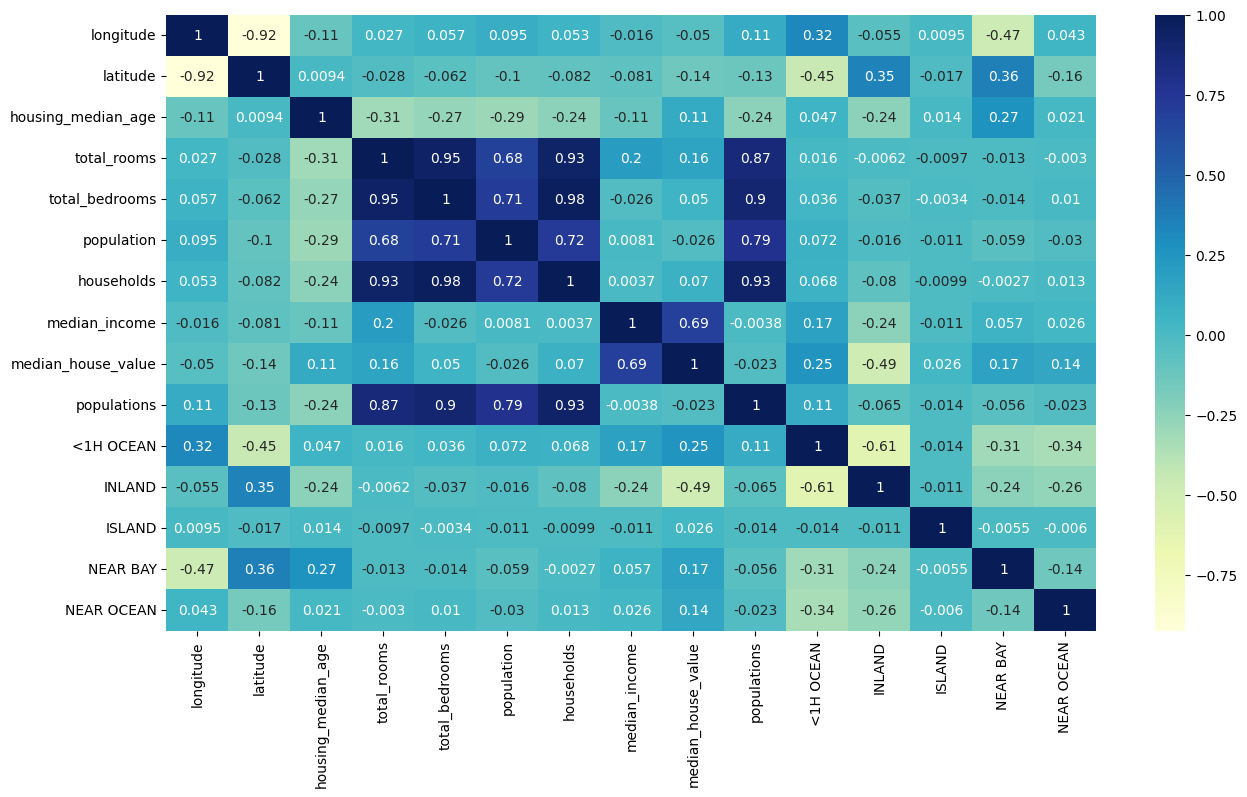

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

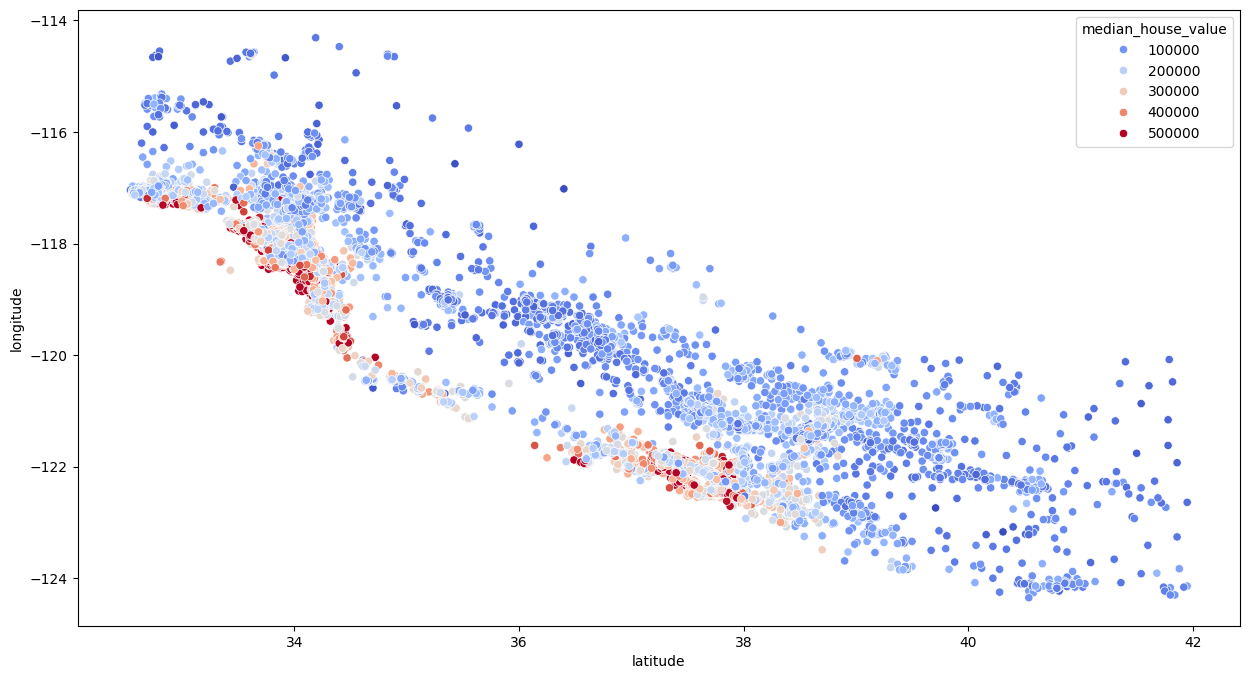

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']  / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

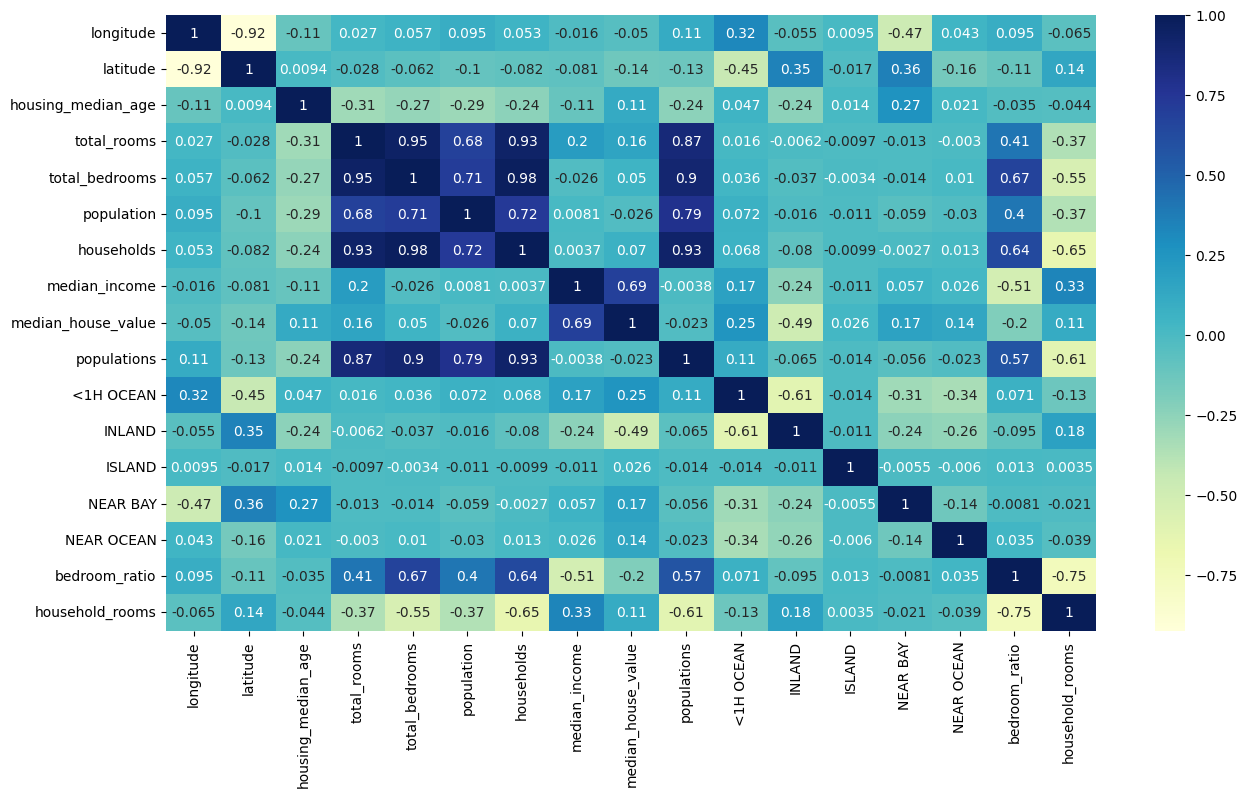

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,populations,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3151,-118.61,34.99,11.0,8.302018,6.642487,1539.0,6.336826,3.8917,120800.0,7.339538,False,True,False,False,False,0.800105,1.310122
18800,-121.86,40.77,17.0,7.943428,6.461468,1027.0,6.008813,2.5030,65600.0,6.935370,False,True,False,False,False,0.813436,1.321963
5787,-118.24,34.15,19.0,8.487352,7.290293,3171.0,7.195187,2.5924,192900.0,8.062118,True,False,False,False,False,0.858960,1.179587
1076,-121.80,39.75,11.0,8.883640,7.212294,3264.0,7.142827,3.1125,122600.0,8.091015,False,True,False,False,False,0.811863,1.243715
3986,-118.64,34.18,33.0,8.245122,6.436150,1784.0,6.423247,5.1641,263400.0,7.487174,True,False,False,False,False,0.780601,1.283638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,-118.39,34.05,25.0,7.942718,6.553933,1139.0,6.490724,4.0153,460000.0,7.038784,True,False,False,False,False,0.825150,1.223703
12803,-121.45,38.60,44.0,7.751475,6.025866,823.0,5.929589,4.6625,158900.0,6.714171,False,True,False,False,False,0.777383,1.307253
5826,-118.30,34.19,52.0,7.441320,5.627621,746.0,5.572154,4.7986,326100.0,6.616065,True,False,False,False,False,0.756266,1.335448
16738,-122.42,37.71,44.0,7.640604,6.194405,1781.0,6.171701,3.6827,215300.0,7.485492,False,False,False,True,False,0.810722,1.238006


In [24]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['populations'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']  / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [25]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)


RandomForestRegressor()

In [27]:
forest.score(X_test, y_test)

0.8169256286585325